

# Introduction

Music genre classification forms a basic step for building a strong recommendation system.

The idea behind this project is to see how to handle sound files in python, compute sound and audio features from them, run Machine Learning Algorithms on them, and see the results.

In a more systematic way, the main aim is to create a machine learning model, which classifies music samples into different genres. It aims to predict the genre using an audio signal as its input.

The objective of automating the music classification is to make the selection of songs quick and less cumbersome. If one has to manually classify the songs or music, one has to listen to a whole lot of songs and then select the genre. This is not only time-consuming but also difficult. Automating music classification can help to find valuable data such as trends, popular genres, and artists easily. Determining music genres is the very first step towards this direction.



## Dataset


For this project, the dataset that we will be working with is GTZAN Genre Classification dataset which consists of 1,000 audio tracks, each 30 seconds long. It contains 10 genres, each represented by 100 tracks.


The 10 genres are as follows:

Blues

Classical

Country

Disco

Hip-hop

Jazz

Metal

Pop

Reggae

Rock


In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import os

import librosa
import librosa.display
import IPython.display as ipd
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import os
general_path = 'genres_original'
print(list(os.listdir(f'{general_path}')))

['reggae', 'jazz', 'pop', 'metal', 'country', 'hiphop', 'rock', 'classical', 'blues', 'disco']


# Explore Audio Data

## Understanding Audio
Let's first Explore our Audio Data to see how it looks (we'll work with `reggae.00036.wav` file).

* **Sound**: sequence of vibrations in varying pressure strengths (`y`)
* The **sample rate** (`sr`) is the number of samples of audio carried per second, measured in Hz or kHz

In [ ]:
# Importing 1 file
y, sr = librosa.load(f'{general_path}/reggae/reggae.00036.wav')

print('y:', y, '\n')
print('y shape:', np.shape(y), '\n')
print('Sample Rate (KHz):', sr, '\n')

# Verify length of the audio
print('Check Len of Audio:', len(y)/sr)

y: [0.02072144 0.04492188 0.05422974 ... 0.06912231 0.08303833 0.08572388] 

y shape: (661794,) 

Sample Rate (KHz): 22050 

Check Len of Audio: 30.013333333333332


### 2D Representation: Sound Waves

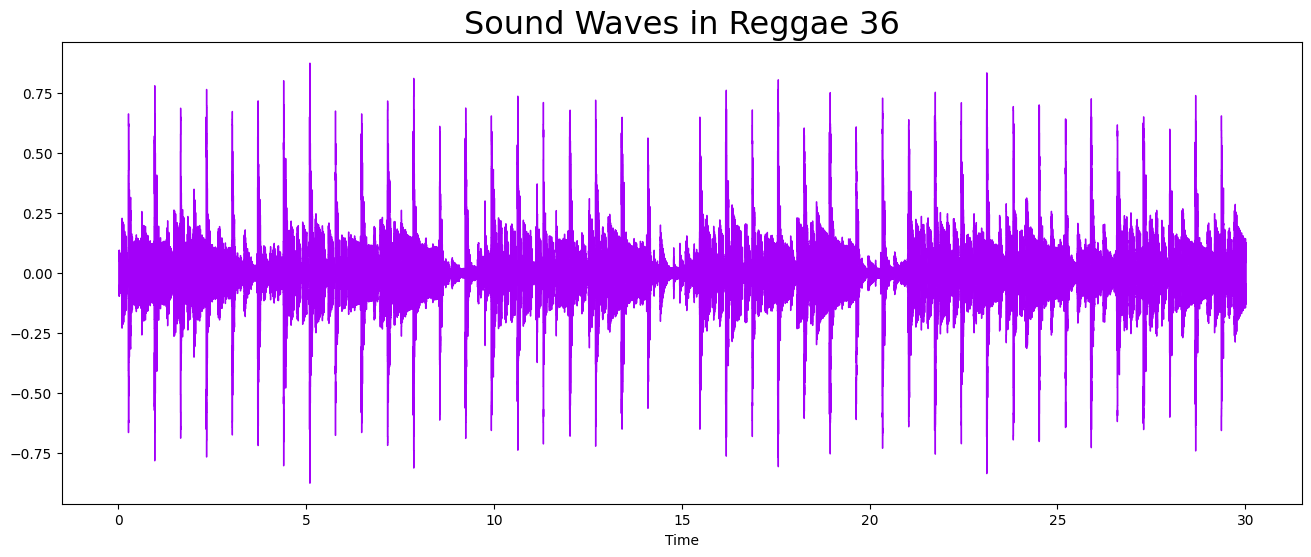

In [ ]:
plt.figure(figsize = (16, 6))
librosa.display.waveshow(y = audio_file, sr = sr, color = "#A300F9");
plt.title("Sound Waves in Reggae 36", fontsize = 23);

### The Spectrogram

A spectrogram is a visual way of representing the signal loudness of a signal over time at various frequencies present in a particular waveform. Not only can one see whether there is more or less energy at, for example, 2 Hz vs 10 Hz, but one can also see how energy levels vary over time.

Spectrograms are sometimes called sonographs, voiceprints, or voicegrams. When the data is represented in a 3D plot, they may be called waterfalls. In 2-dimensional arrays, the first axis is frequency while the second axis is time.

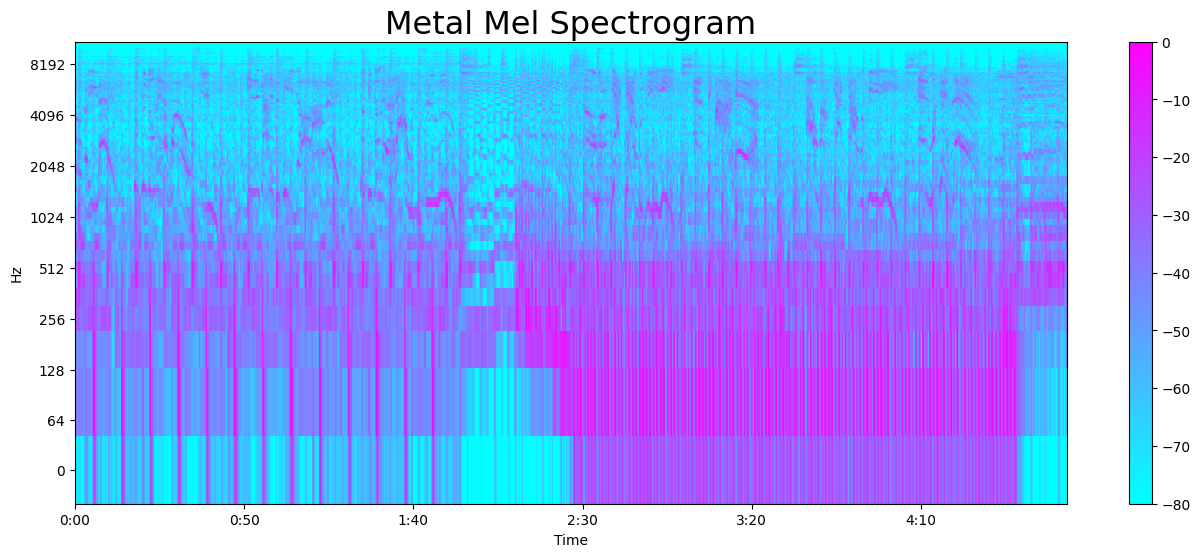

In [ ]:
y, sr = librosa.load(f'{general_path}/metal/metal.00036.wav')
y, _ = librosa.effects.trim(y)
hop_length = 5000
S = librosa.feature.melspectrogram(y=y, sr=sr)
S_DB = librosa.amplitude_to_db(S, ref=np.max)
plt.figure(figsize = (16, 6))
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis = 'time', y_axis = 'log',
                        cmap = 'cool');
plt.colorbar();
plt.title("Metal Mel Spectrogram", fontsize = 23);

## Audio Features

### Zero Crossing Rate

* the rate at which the signal changes from positive to negative or back.

In [ ]:
# Total zero_crossings in our 1 song
zero_crossings = librosa.zero_crossings(audio_file, pad=False)
print(sum(zero_crossings))

39232


### Harmonics and Perceptrual

* Harmonics are characteristichs that human years can't distinguish (represents the sound color)
* Perceptrual understanding shock wave represents the sound rhythm and emotion

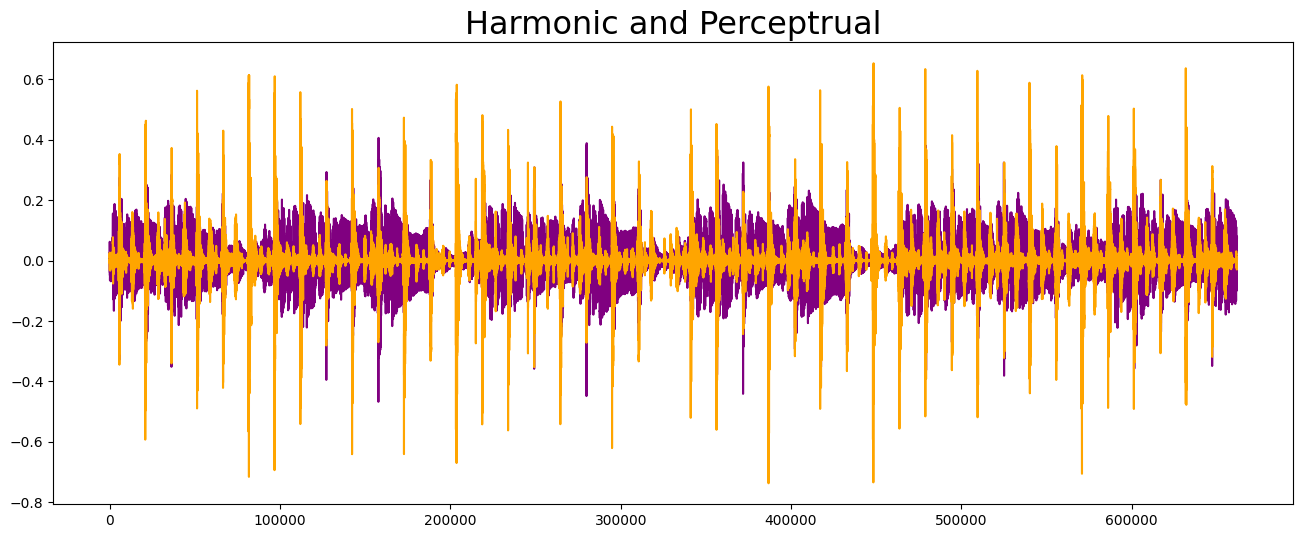

In [ ]:
y_harm, y_perc = librosa.effects.hpss(audio_file)

plt.figure(figsize = (16, 6))
plt.plot(y_harm, color = 'purple');
plt.plot(y_perc, color = 'orange');
plt.title("Harmonic and Perceptrual", fontsize = 23);

### Tempo

* The speed or pace of a given piece of music, usually measured in beats per minute (BPM)

In [ ]:
tempo, _ = librosa.beat.beat_track(y=y, sr = sr)
tempo

array([143.5546875])

### Spectral Centroid

* indicates where the ”centre of mass” for a sound is located and is calculated as the weighted mean of the frequencies present in the sound.

In [ ]:
# Calculate the Spectral Centroids
spectral_centroids = librosa.feature.spectral_centroid(y=audio_file, sr=sr)[0]

# Shape is a vector
print('Centroids:', spectral_centroids, '\n')
print('Shape of Spectral Centroids:', spectral_centroids.shape, '\n')

# Computing the time variable for visualization
frames = range(len(spectral_centroids))

# Converts frame counts to time (seconds)
t = librosa.frames_to_time(frames)

print('frames:', frames, '\n')
print('t:', t)

# Function that normalizes the Sound Data
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

Centroids: [1758.29476821 1946.74243805 2038.81133429 ...  766.50415702 1041.07728753
 1391.05146262] 

Shape of Spectral Centroids: (1293,) 

frames: range(0, 1293) 

t: [0.00000000e+00 2.32199546e-02 4.64399093e-02 ... 2.99537415e+01
 2.99769615e+01 3.00001814e+01]


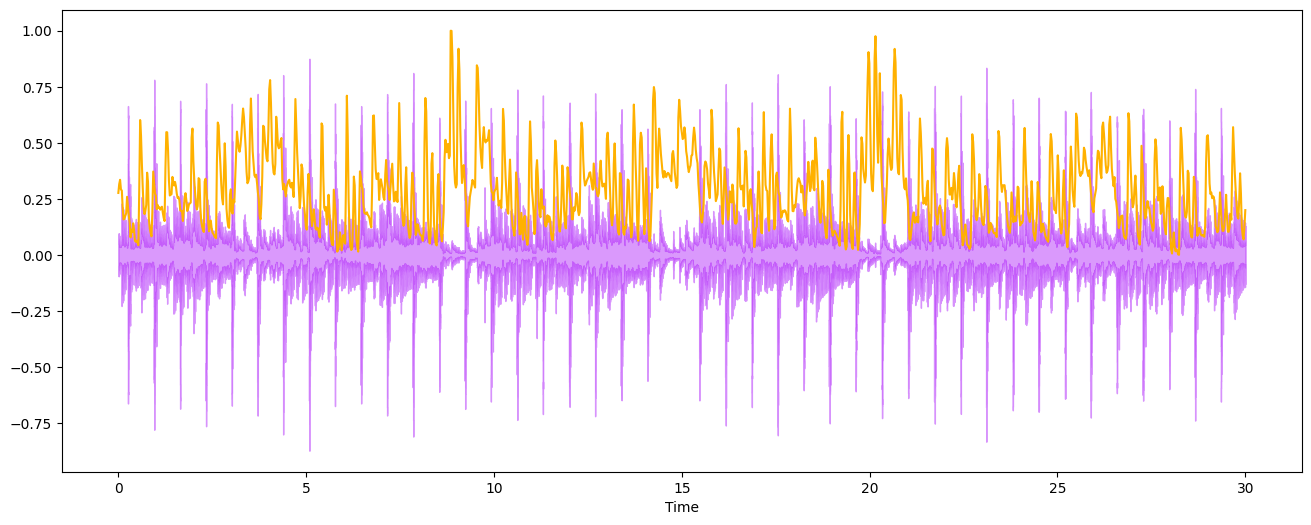

In [ ]:
#Plotting the Spectral Centroid along the waveform
plt.figure(figsize = (16, 6))
librosa.display.waveshow(audio_file, sr=sr, alpha=0.4, color = '#A300F9');
plt.plot(t, normalize(spectral_centroids), color='#FFB100');

### Spectral Rolloff
* is a measure of the shape of the signal. It represents the frequency below which a specified percentage of the total spectral energy, e.g. 85%, lies

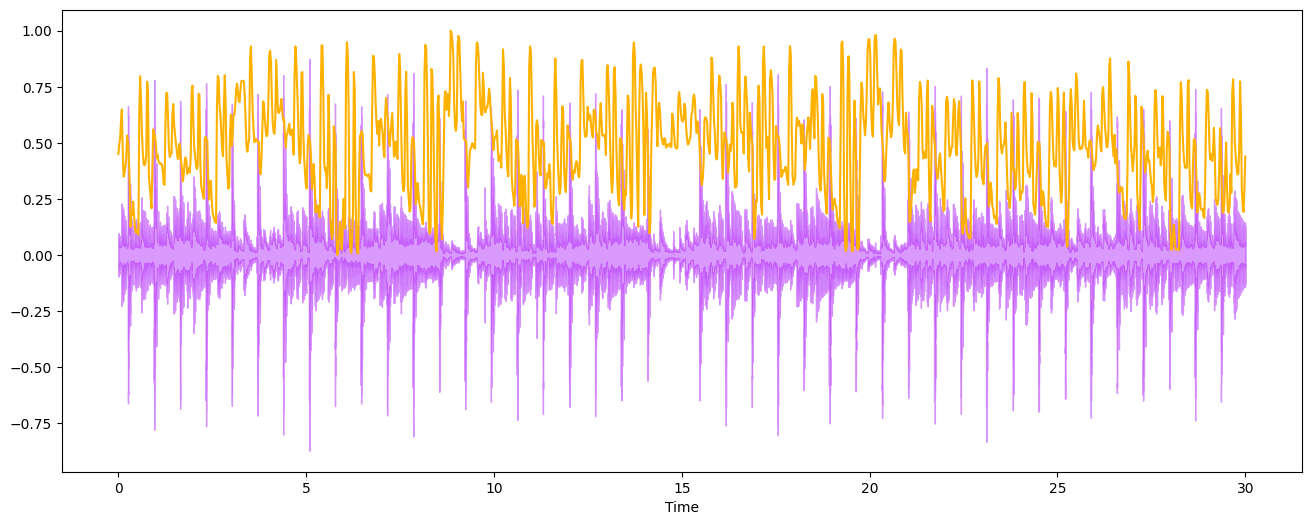

In [ ]:
# Spectral RollOff Vector
spectral_rolloff = librosa.feature.spectral_rolloff(y=audio_file, sr=sr)[0]

# The plot
plt.figure(figsize = (16, 6))
librosa.display.waveshow(audio_file, sr=sr, alpha=0.4, color = '#A300F9');
plt.plot(t, normalize(spectral_rolloff), color='#FFB100');

### Mel-Frequency Cepstral Coefficients:

* The Mel frequency cepstral coefficients (MFCCs) of a signal are a small set of features (usually about 10–20) which concisely describe the overall shape of a spectral envelope. It models the characteristics of the human voice.

mfccs shape: (20, 1293)


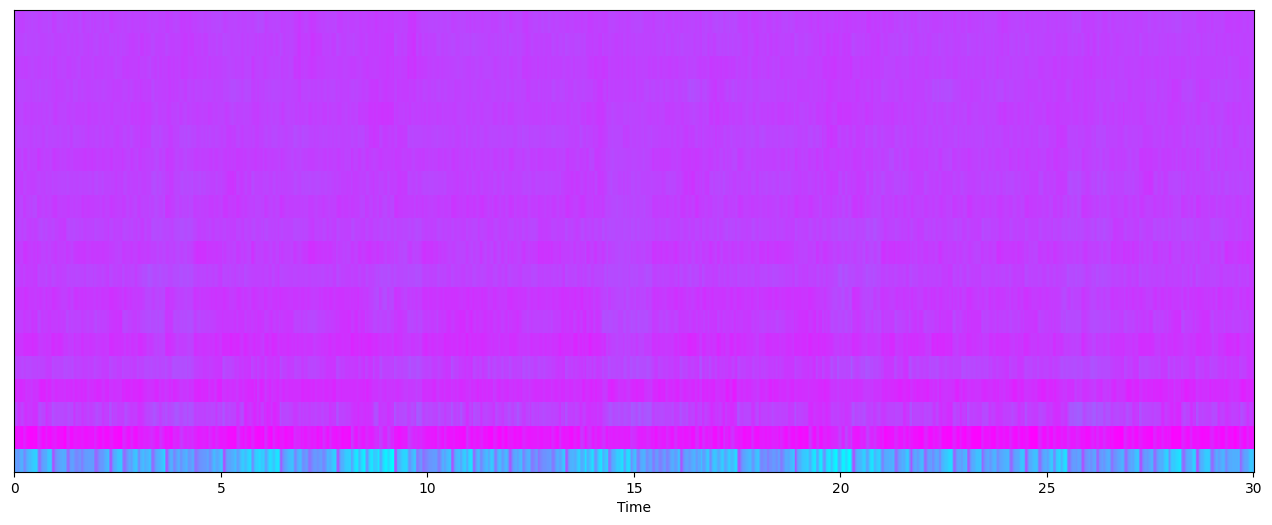

In [ ]:
mfccs = librosa.feature.mfcc(y=audio_file, sr=sr)
print('mfccs shape:', mfccs.shape)

#Displaying  the MFCCs:
plt.figure(figsize = (16, 6))
librosa.display.specshow(mfccs, sr=sr, x_axis='time', cmap = 'cool');

Data needs to be scaled:

Mean: -1.032594e-09 

Var: 1.0000001


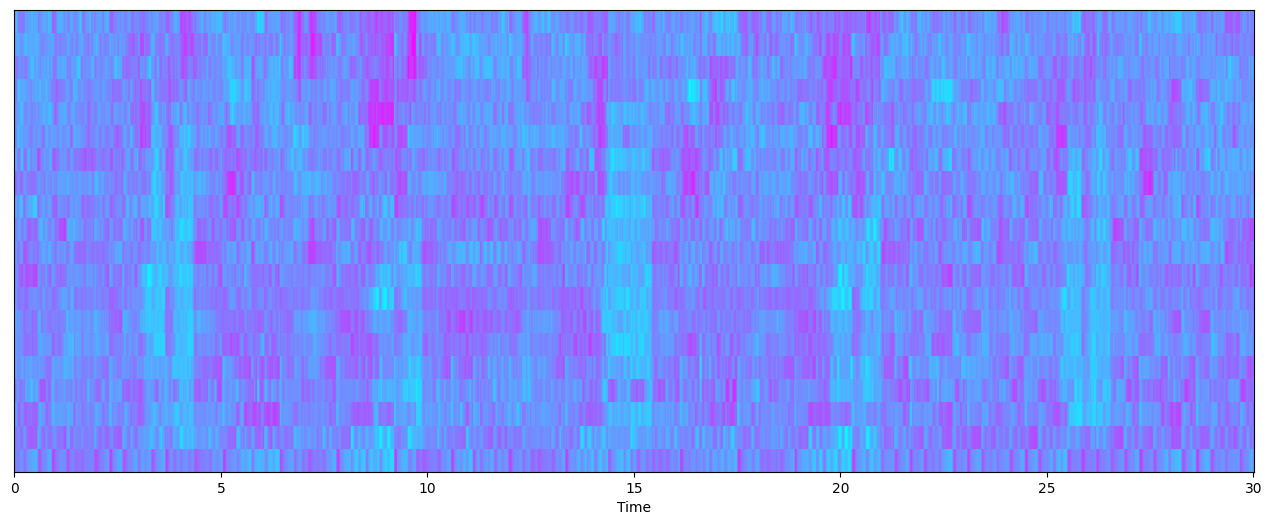

In [ ]:
# Perform Feature Scaling
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print('Mean:', mfccs.mean(), '\n')
print('Var:', mfccs.var())

plt.figure(figsize = (16, 6))
librosa.display.specshow(mfccs, sr=sr, x_axis='time', cmap = 'cool');

### Chroma Frequencies

* Chroma features are an interesting and powerful representation for music audio in which the entire spectrum is projected onto 12 bins representing the 12 distinct semitones (or chroma) of the musical octave.

Chromogram shape: (12, 133)


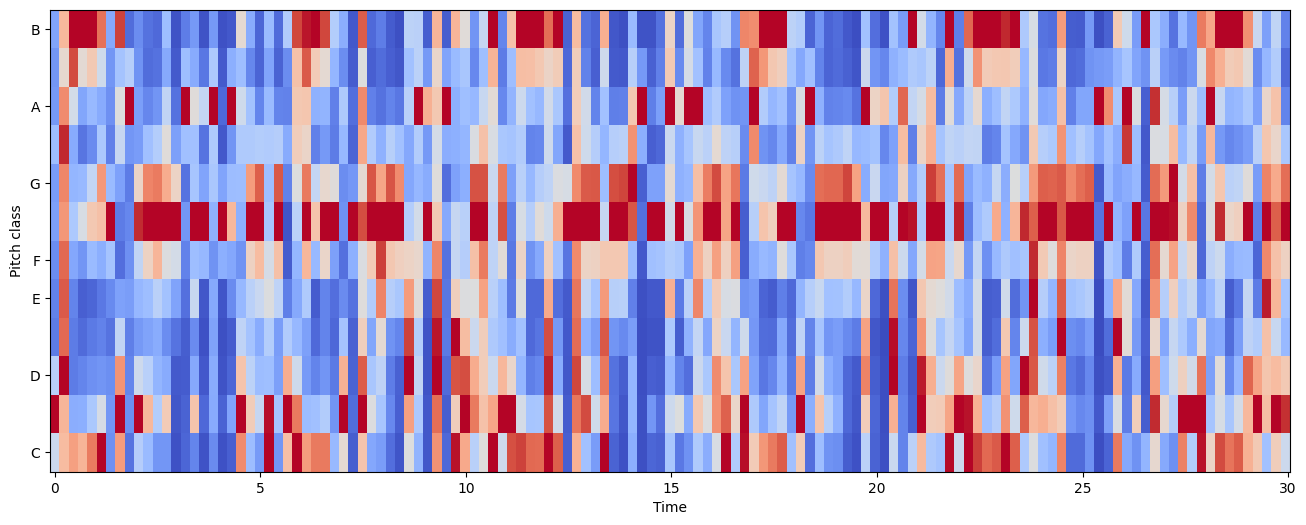

In [ ]:
# Increase or decrease hop_length to change how granular you want your data to be
hop_length = 5000

# Chromogram
chromagram = librosa.feature.chroma_stft(y=audio_file, sr=sr, hop_length=hop_length)
print('Chromogram shape:', chromagram.shape)

plt.figure(figsize=(16, 6))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm');

# Features and Spectrogram Extraction from audios and Augmentation.


Due to the limited number of audio samples in our dataset (only 100 per genre), we are splitting each 30-second audio file into three 3-second segments. For each segment, we generate 3 augmented versions, then extract features and spectrograms from these to build our models


The augmentation is done with audiomentations libray. by following operations.

* Timestretch : This technique changes the speed or duration of an audio signal without altering its pitch.

* PitchShift : This effect shifts the pitch of the audio up or down by a specified number of semitones while keeping the duration of the audio the same.

* AddGaussianNoise : This technique adds random Gaussian noise to the audio signal.

* Shift : This operation shifts the audio forward or backward in time.

In [ ]:
pip install audiomentations # library for augmentation of audio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 21.2 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xgboost 2.1.1 requires nvidia-nccl-cu12; platform_system == "Linux" and platform_machine != "aarch64", which is not installed.
osqp 0.6.7.post0 requires scipy!=1.12.0,>=0.13.2, but you have scipy 1.12.0 which is incompatible.


1. Augmentation and Feature Extraction from audios

In [ ]:
import os
import librosa
import pandas as pd
import numpy as np
from tqdm import tqdm
from audiomentations import Compose, TimeStretch, PitchShift, AddGaussianNoise, Shift


# Define the directory where the Gtzan dataset is located
data_dir = 'genres_original'

# Define a function to perform data augmentation
def augment_audio(segment_y, sample_rate):
    augmentations = Compose([
        TimeStretch(min_rate=0.8, max_rate=1.2, p=0.7),
        PitchShift(min_semitones=-2, max_semitones=2, p=0.7),
        AddGaussianNoise(min_amplitude=0.001, max_amplitude=0.015, p=0.7),
        Shift(min_shift=-0.1, max_shift=0.1, p=0.7)
    ])
    augmented_segment_y = augmentations(samples=segment_y, sample_rate=sample_rate)
    return augmented_segment_y

# Define a function to extract features from an audio segment
def extract_features(segment_y, label, sample_rate, filename, segment_index, augmentation_index=None):
    chroma_stft_mean = np.mean(librosa.feature.chroma_stft(y=segment_y, sr=sample_rate))
    chroma_stft_var = np.var(librosa.feature.chroma_stft(y=segment_y, sr=sample_rate))
    rms_mean = np.mean(librosa.feature.rms(y=segment_y))
    rms_var = np.var(librosa.feature.rms(y=segment_y))
    spectral_centroid_mean = np.mean(librosa.feature.spectral_centroid(y=segment_y, sr=sample_rate))
    spectral_centroid_var = np.var(librosa.feature.spectral_centroid(y=segment_y, sr=sample_rate))
    spectral_bandwidth_mean = np.mean(librosa.feature.spectral_bandwidth(y=segment_y, sr=sample_rate))
    spectral_bandwidth_var = np.var(librosa.feature.spectral_bandwidth(y=segment_y, sr=sample_rate))
    rolloff_mean = np.mean(librosa.feature.spectral_rolloff(y=segment_y, sr=sample_rate))
    rolloff_var = np.var(librosa.feature.spectral_rolloff(y=segment_y, sr=sample_rate))
    zero_crossing_rate_mean = np.mean(librosa.feature.zero_crossing_rate(segment_y))
    zero_crossing_rate_var = np.var(librosa.feature.zero_crossing_rate(segment_y))
    harmony_mean = np.mean(librosa.effects.harmonic(y=segment_y))
    harmony_var = np.var(librosa.effects.harmonic(y=segment_y))
    perceptr_mean = np.mean(librosa.effects.percussive(y=segment_y))
    perceptr_var = np.var(librosa.effects.percussive(y=segment_y))
    tempo, _ = librosa.beat.beat_track(y=segment_y, sr=sample_rate)
    mfccs = librosa.feature.mfcc(y=segment_y, sr=sample_rate, n_mfcc=20)
    mfcc_means = np.mean(mfccs, axis=1)
    mfcc_vars = np.var(mfccs, axis=1)

    if augmentation_index is not None:
        filename = f"{os.path.splitext(filename)[0]}.{segment_index}.{augmentation_index}.wav"
    else:
        filename = f"{os.path.splitext(filename)[0]}.{segment_index}.wav"

    return [filename, label, chroma_stft_mean, chroma_stft_var, rms_mean, rms_var,
            spectral_centroid_mean, spectral_centroid_var, spectral_bandwidth_mean, spectral_bandwidth_var,
            rolloff_mean, rolloff_var, zero_crossing_rate_mean, zero_crossing_rate_var,
            harmony_mean, harmony_var, perceptr_mean, perceptr_var, tempo] + list(mfcc_means) + list(mfcc_vars)

# Create a DataFrame to store the features
columns = ['filename', 'label', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean', 'rms_var',
           'spectral_centroid_mean', 'spectral_centroid_var',
           'spectral_bandwidth_mean', 'spectral_bandwidth_var',
           'rolloff_mean', 'rolloff_var',
           'zero_crossing_rate_mean', 'zero_crossing_rate_var',
           'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var',
           'tempo'] + [f'mfcc{i}_mean' for i in range(1, 21)] + [f'mfcc{i}_var' for i in range(1, 21)]

df_list = []  # List to store individual DataFrames for segment and augmented files

# Loop through each audio file and extract features from segment and augmented versions
for root, subdirs, files in os.walk(data_dir):
    for file in tqdm(files, desc="Processing Files", unit="file"):
        if file.endswith(".wav"):  # Assuming the audio files are in WAV format
            label = os.path.basename(root)
            audio_file = os.path.join(root, file)
            y, sr = librosa.load(audio_file)

            # Divide the audio into 3-second segments
            segment_duration = 3 * sr
            num_segments = len(y) // segment_duration

            for segment_index in range(num_segments):
                start_sample = segment_index * segment_duration
                end_sample = (segment_index + 1) * segment_duration
                segment_y = y[start_sample:end_sample]

                # Extract features from the original segment
                original_segment_features = extract_features(segment_y, label, sr, file, segment_index)
                df_list.append(original_segment_features)

                # Generate 3 augmented versions of the audio segment
                for augmentation_index in range(3):
                    augmented_segment_y = augment_audio(segment_y, sr)

                    # Extract features from the augmented segment
                    augmented_segment_features = extract_features(augmented_segment_y, label, sr, file, segment_index, augmentation_index)
                    df_list.append(augmented_segment_features)

# Create the DataFrame from the list of segment and augmented features
df = pd.DataFrame(df_list, columns=columns)

df = df.sort_values(by='filename', ignore_index=True)

# Save the DataFrame to a CSV file
csv_file = '3sec_with_3_augmented_features.csv'
df.to_csv(csv_file, index=False)
print(f"Features extracted and data saved to {csv_file}.")


Processing Files: 100%|██████████| 100/100 [1:38:02<00:00, 58.82s/file]


Features extracted and data saved to gtzan_augmented_features_with_segments_10_sec_reggae.csv.


In [ ]:
data = pd.read_csv('3sec_with_3_augmented_features.csv')
data.head()

,filename,label,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc11_var,mfcc12_var,mfcc13_var,mfcc14_var,mfcc15_var,mfcc16_var,mfcc17_var,mfcc18_var,mfcc19_var,mfcc20_var
0,blues.00000.0.0.wav,blues,0.402616,0.097353,0.056319,0.000821,3535.950530,603169.507342,3239.535510,30197.059970,...,39.992615,30.588913,41.515606,33.526820,44.506897,35.824654,25.729515,32.907745,37.744114,34.256970
1,blues.00000.0.1.wav,blues,0.342190,0.089036,0.124419,0.003155,1845.472515,112527.743546,2132.790549,72044.684542,...,55.469670,45.048626,40.102512,38.005090,52.373150,66.492250,35.037020,40.724440,54.881770,47.104960
2,blues.00000.0.2.wav,blues,0.398992,0.097492,0.054507,0.000781,3284.253805,656281.845119,3140.170775,42316.339003,...,36.382786,36.369530,35.985540,32.080135,46.798950,28.914150,40.987576,47.586445,36.736763,26.362597
3,blues.00000.0.wav,blues,0.342070,0.089073,0.124413,0.003156,1782.836092,116521.944469,2020.991068,84079.610961,...,55.629684,45.939034,41.156006,41.041683,55.765972,69.991180,35.529600,43.518330,58.701084,48.072550
4,blues.00000.1.0.wav,blues,0.384602,0.086270,0.096694,0.001300,2566.478507,215787.948646,2869.968448,82537.307463,...,51.718307,39.691170,30.848093,34.800396,31.761084,24.630606,34.768875,33.339920,28.169940,24.047659


2. Augmentation and Spectrogram Extraction from audio

In [ ]:
import os
import librosa
import pandas as pd
import numpy as np
from tqdm import tqdm
from audiomentations import Compose, TimeStretch, PitchShift, AddGaussianNoise,Shift
import random
import matplotlib.pyplot as plt

# Set a specific random seed for reproducibility
random_seed = 42
random.seed(random_seed)
np.random.seed(random_seed)

# Define the directory where the Gtzan dataset is located
data_dir = 'genres_original'

# Define the output directory where you want to save spectrograms
output_dir = '3sec_with_3_augmented_spectrogram_images'

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Define the function to create subdirectories for each genre and perform data augmentation and save spectrograms
def generate_spectrograms(audio_file, output_dir):
    y, sr = librosa.load(audio_file)

    # Define a set of audio augmentations to apply with higher probabilities
    augmentations = Compose([
        TimeStretch(min_rate=0.8, max_rate=1.2, p=0.7),
        PitchShift(min_semitones=-2, max_semitones=2, p=0.7),
        AddGaussianNoise(min_amplitude=0.001, max_amplitude=0.015, p=0.7),
        Shift(min_shift=-0.1, max_shift=0.1, p=0.7)
    ])

    # Divide the audio into 3-second segments
    segment_duration = 3 * sr
    num_segments = len(y) // segment_duration

    # Determine the genre based on the path
    genre = os.path.basename(os.path.dirname(audio_file))

    for segment_index in range(num_segments):
        start_sample = segment_index * segment_duration
        end_sample = (segment_index + 1) * segment_duration
        segment_y = y[start_sample:end_sample]

        # Generate a unique filename for each segment
        filename = os.path.splitext(os.path.basename(audio_file))[0]

        # Create subdirectories for each genre
        os.makedirs(os.path.join(output_dir, genre), exist_ok=True)

        # Save the spectrogram for the original segment
        spectrogram_filename = f"{filename}.{segment_index}.png"
        spectrogram_output_path = os.path.join(output_dir, genre, spectrogram_filename)

        plt.figure(figsize=(3, 3))
        D = librosa.amplitude_to_db(np.abs(librosa.stft(segment_y)), ref=np.max)
        librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log', cmap='viridis')
        plt.axis('off')
        plt.savefig(spectrogram_output_path, bbox_inches='tight', pad_inches=0, transparent=True)
        plt.close()


        for augmentation_index in range(3):
            # Apply augmentations to the segment
            augmented_y = augmentations(samples=segment_y, sample_rate=sr)

            spectrogram_filename = f"{filename}.{segment_index}.{augmentation_index}.png"
            spectrogram_output_path = os.path.join(output_dir, genre, spectrogram_filename)

            # Generate and save a colored spectrogram for the augmented segment
            plt.figure(figsize=(3, 3))
            D = librosa.amplitude_to_db(np.abs(librosa.stft(augmented_y)), ref=np.max)
            librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log', cmap='viridis')
            plt.axis('off')
            plt.savefig(spectrogram_output_path, bbox_inches='tight', pad_inches=0, transparent=True)
            plt.close()

# Loop through each audio file and generate spectrograms
for root, subdirs, files in os.walk(data_dir):
    for file in tqdm(files, desc="Processing Files", unit="file"):
        if file.endswith(".wav"):  # Assuming the audio files are in WAV format
            audio_file = os.path.join(root, file)

            # Generate and save spectrograms
            generate_spectrograms(audio_file, output_dir)

print(f"Spectrogram images generated and saved to {output_dir}.")


Processing Files: 0file [00:00, ?file/s]
Processing Files:  40%|████      | 40/100 [06:58<12:00, 12.00s/file]

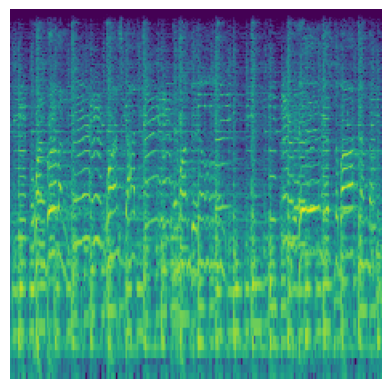

In [ ]:
import matplotlib.image as mpimg

# Load the image
image = mpimg.imread('3sec_with_3_augmented_spectrogram_images/blues/blues.00000.0.png')

# Display the image
plt.imshow(image)
plt.axis('off')
plt.show()

# Machine Learning Classification

Using the `gtzan_features_with_augmentation_10sec_segments.csv` file, we can try to build a classifier that  predicts for any new audio file input it's genre.

### Libraries

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder, StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('/content/3sec_with_3_augmented_features.csv')
data.head(10)

,filename,label,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc11_var,mfcc12_var,mfcc13_var,mfcc14_var,mfcc15_var,mfcc16_var,mfcc17_var,mfcc18_var,mfcc19_var,mfcc20_var
0,blues.00000.0.0.wav,blues,0.402616,0.097353,0.056319,0.000821,3535.950530,603169.507342,3239.535510,30197.059970,...,39.992615,30.588913,41.515606,33.526820,44.506897,35.824654,25.729515,32.907745,37.744114,34.256970
1,blues.00000.0.1.wav,blues,0.342190,0.089036,0.124419,0.003155,1845.472515,112527.743546,2132.790549,72044.684542,...,55.469670,45.048626,40.102512,38.005090,52.373150,66.492250,35.037020,40.724440,54.881770,47.104960
2,blues.00000.0.2.wav,blues,0.398992,0.097492,0.054507,0.000781,3284.253805,656281.845119,3140.170775,42316.339003,...,36.382786,36.369530,35.985540,32.080135,46.798950,28.914150,40.987576,47.586445,36.736763,26.362597
3,blues.00000.0.wav,blues,0.342070,0.089073,0.124413,0.003156,1782.836092,116521.944469,2020.991068,84079.610961,...,55.629684,45.939034,41.156006,41.041683,55.765972,69.991180,35.529600,43.518330,58.701084,48.072550
4,blues.00000.1.0.wav,blues,0.384602,0.086270,0.096694,0.001300,2566.478507,215787.948646,2869.968448,82537.307463,...,51.718307,39.691170,30.848093,34.800396,31.761084,24.630606,34.768875,33.339920,28.169940,24.047659
5,blues.00000.1.1.wav,blues,0.338681,0.087133,0.069505,0.000637,2468.145312,185571.769064,2842.727239,70728.476309,...,41.509890,52.975550,36.045856,30.016323,29.126282,40.747290,34.387570,40.442726,40.505295,27.188221
6,blues.00000.1.2.wav,blues,0.442023,0.093018,0.056270,0.000721,3079.337856,924811.804728,3014.551767,62767.583468,...,53.305070,32.781760,34.127647,31.770650,29.331924,25.404945,30.093319,36.053240,26.520344,21.530266
7,blues.00000.1.wav,blues,0.366582,0.088140,0.135153,0.002838,1803.933532,180281.486459,2044.581964,90152.402690,...,69.568520,49.287704,41.149227,39.675198,36.654920,36.868220,38.904987,44.215470,39.474648,30.919678
8,blues.00000.2.0.wav,blues,0.336716,0.091133,0.064204,0.000684,2294.346969,118313.021646,2580.427287,56049.294189,...,72.495290,44.160137,41.882538,34.003445,51.784286,39.413517,43.612755,61.549984,55.916620,65.695890
9,blues.00000.2.1.wav,blues,0.332183,0.088751,0.072680,0.000917,2604.139728,171446.238525,2820.946312,56774.974113,...,47.355724,40.408900,59.312100,49.610443,43.710873,32.842070,51.926342,53.502100,35.066330,33.446220
